# RIDGE, LASSO AND ELASTIC NET

### Adapted from Seth Flaxman
#### Questions to Mariana Clare (mc4117@ic.ac.uk)

First, you will familiarize yourself with the maths underlying the ridge and lasso penalties. Then you will 
write code to investigate bias and variance in the context of ridge, lasso, and the elastic net. 
Finally you will investigate Principal Components Analysis (PCA) as an alternative dimensionality reduction method.

## Ridge and lasso 
Let us considered squared error loss, i.e. in linear regression.
The ridge penalty adds an $L_2$ norm to a loss function: 
$\sum (y_i - x_i\beta)^2 + \lambda \|\beta\|^2_2$

The lasso penalty adds an $L_1$ norm to a loss function:
$\sum (y_i - x_i\beta)^2 + \lambda |\beta|_1^1$

The loss function for ridge leads to the following optimization problem:

$\mbox{argmin}_{\beta} \sum (y_i - x_i\beta)^2 + \lambda \|\beta\|^2_2$

* Assume that $\beta \in R^p$ is a p-dimensional vector and rewrite the loss function with the $L_2$ norm using the vector elements
$\beta_1$, $\beta_2, \ldots, \beta_p$.

* Similarly, write the loss function for the lasso using vector elements.

* To minimize these loss functions, we need to find their gradients. Find the gradient of the ridge penalized loss function. What parameter are you taking the gradient with respect to?



## Bias vs. variance
Ridge and lasso introduce *bias* by shrinking the parameters in a model towards zero. Here is the code from the unbiased linear regression demo in class:

1.5031230236469135
0.0054730215570116605


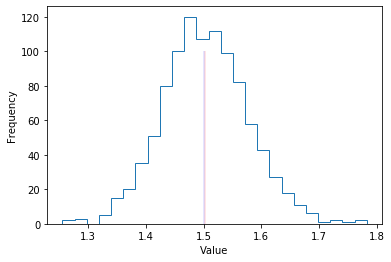

In [23]:
import math 
import numpy as np
import pylab as plt
from scipy.optimize import minimize

def yhat(beta, x):
    return beta*x

def squared_loss(beta):
    return sum((y - yhat(beta,x))**2)

result = []

for i in range(1000):
    n = 50
    x = np.random.randn(n)
    u = np.linspace(-5, 5, 11) #Unclear what this is
    error = np.random.randn(n) * .5
    y = 1.5 * x + error #This is the true regression equation; so true B is 1.5. Adding noise to this
    x_0 = -1 #that is just random starting guess
    objective = lambda b: squared_loss(b)
    bnds = [(-1, 3)] #Bounds are the minimum and max values for your Betas
    betahat = minimize(objective, x_0, bounds=bnds) #minimise minimises a function, will run a loss solver e.g. gradient descent in this case objective, often uses a lambda function
      
    result.append(betahat['x'][0])

plt.hist(result, bins = 25, histtype=u'step')
plt.vlines(np.mean(result), 0, 100, color = 'red', linewidth = 0.2)
plt.vlines(1.5, 0, 100, color = 'blue', linewidth = 0.2)
plt.xlabel('Value')
plt.ylabel('Frequency')

print(np.mean(result))
print(np.var(result))

#optimise works by taking an input and a function, and determining best parameter given these

1


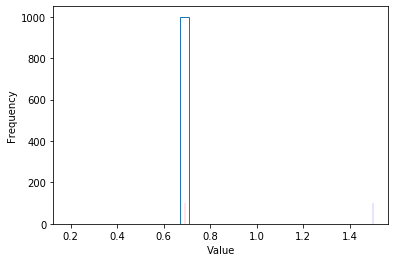

2


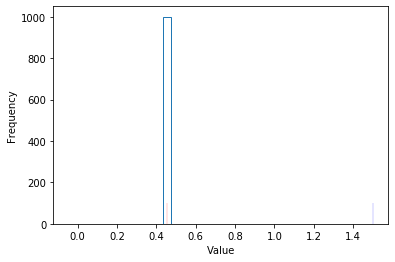

3


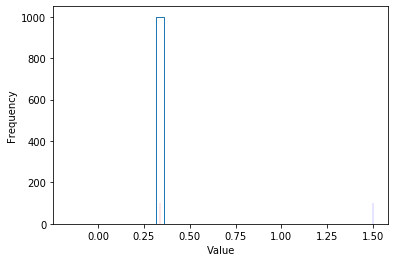

4


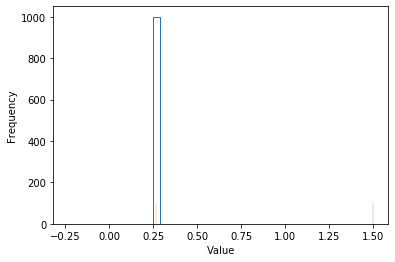

5


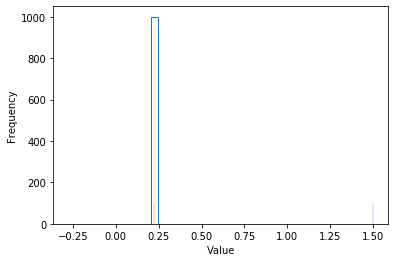

6


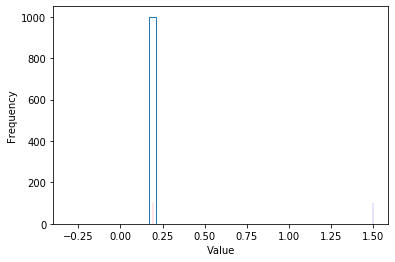

7


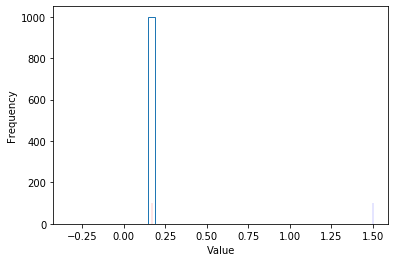

8


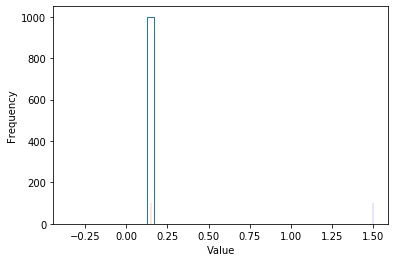

9


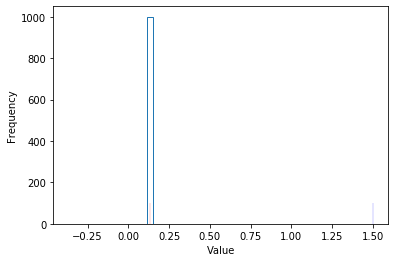

In [55]:
#Code with a ridge penalty
def yhat(beta, x):
    return beta*x

def squared_loss_ridge(beta):
    return sum((y - yhat(beta,x))**2 + lam*(beta.T*beta))

def beta_range(lam):
    result = []
    lam = lam
    for i in range(1000):
        n = 50
        x = np.random.randn(n)
        u = np.linspace(-5, 5, 11) 
        error = np.random.randn(n) * .5
        y = 1.5 * x + error
        x_0 = -1
        objective = lambda b: squared_loss_ridge(b)
        bnds = [(-1, 3)]
        betahat = minimize(objective, x_0, bounds=bnds)

        result.append(betahat['x'][0])

    plt.hist(result, bins = 25, histtype=u'step')
    plt.vlines(np.mean(result), 0, 100, color = 'red', linewidth = 0.2)
    plt.vlines(1.5, 0, 100, color = 'blue', linewidth = 0.2)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

#     print(np.mean(result))
#     print(np.var(result))
    
for lam in range(1,10,1):
    print(lam)
    beta_range(lam)
    
#Here we are defining function beta_range and then looping through different values of lambda
#Can see with higher values of lambda, B coefficint is increasingly shrunk

1


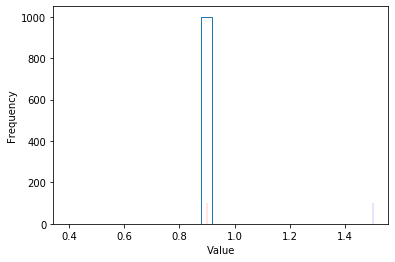

2


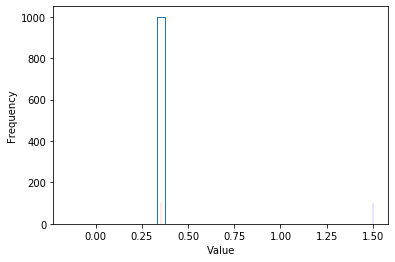

3


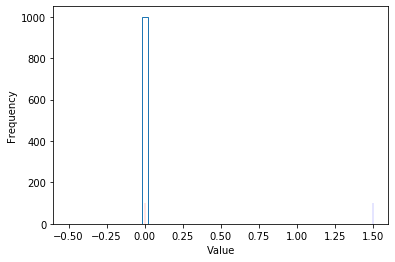

4


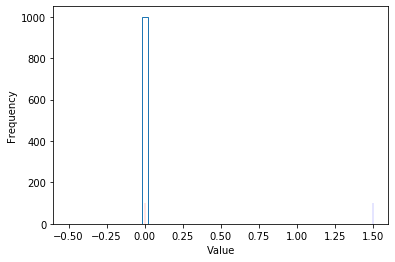

5


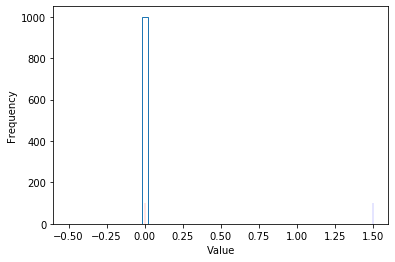

6


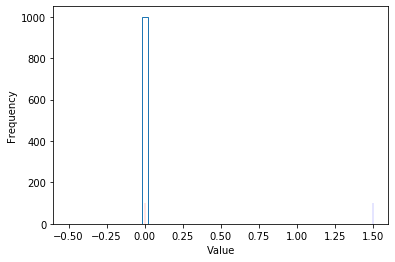

7


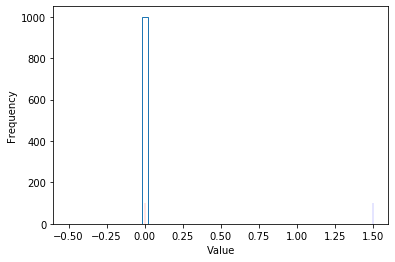

8


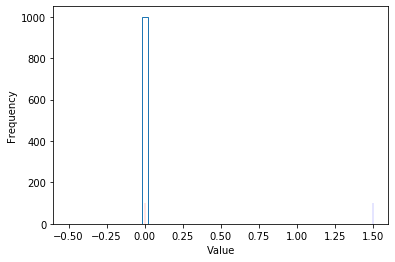

9


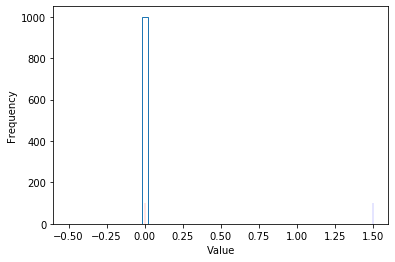

In [58]:
#Code with a lasso penalty
def yhat(beta, x):
    return beta*x

def squared_loss_lasso(beta):
    return sum((y - yhat(beta,x))**2 + lam*(np.absolute(beta)))

def beta_range(lam):
    result = []
    lam = lam
    for i in range(1000):
        n = 50
        x = np.random.randn(n)
        u = np.linspace(-5, 5, 11) 
        error = np.random.randn(n) * .5
        y = 1.5 * x + error
        x_0 = -1
        objective = lambda b: squared_loss_lasso(b)
        bnds = [(-1, 3)]
        betahat = minimize(objective, x_0, bounds=bnds)

        result.append(betahat['x'][0])

    plt.hist(result, bins = 25, histtype=u'step')
    plt.vlines(np.mean(result), 0, 100, color = 'red', linewidth = 0.2)
    plt.vlines(1.5, 0, 100, color = 'blue', linewidth = 0.2)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

#     print(np.mean(result))
#     print(np.var(result))
    
for lam in range(1,10,1):
    print(lam)
    beta_range(lam)
    
#Here we are defining function beta_range and then looping through different values of lambda
#Can see with higher values of labmda, B coefficients shrunk to 0 (sparsity induced!)

* Modify the code to include a ridge penalty. Consider a range of $\lambda$ values from 0 to 10. What do you notice?
* Modify the code to include a lasso penalty.  Consider a range of $\lambda$ values from 0 to 10. What do you notice?
* Earlier you found the derivatives of the ridge and lasso penalties. How does each vary with $\beta$? What does this mean in terms of how much each penalty penalizes large vs. small values of $\beta$?

## Mouse genome dataset example with ridge, lasso, and the elastic net

Ridge and lasso decrease *variance* by making a model less complex. We will consider a mouse genome dataset to predict red blood cell count from SNPs.
You can read about
the dataset at https://www.sanger.ac.uk/science/data/mouse-genomes-project 

The dataset has 1522 observations and 10346 predictors. We've provided you with an 80% train and 10% test dataset. If we consider just linear regression,
the problem is overdetermined, and we can find an infinite number of models which perfectly fit the data:

In [35]:
import pyreadr # you will need to pip install this
result = pyreadr.read_r('mice.rdata')

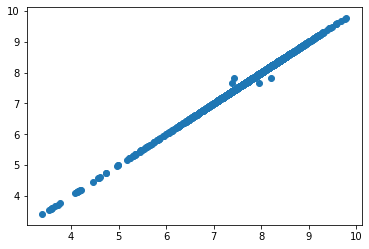

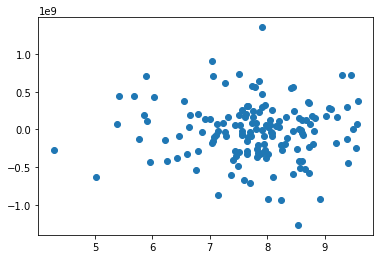

In [39]:
from sklearn.linear_model import LinearRegression
import pylab as plt

X_train = result['X_train']

# there are computational difficulties in addition to theoretical ones with fitting a model with so many predictors, so we randomly sample 1300
ii = X_train.sample(1300, axis = 1)

y_train = result['y_train']
X_test = result['X_test']
y_test = result['y_test']

reg = LinearRegression().fit(ii, y_train)

plt.scatter(y_train, reg.predict(ii)) # almost perfect
plt.show()


plt.scatter(y_test, reg.predict(X_test[list(ii.columns)])) # very bad fit---this is because our model has high variance
plt.show()

In [43]:
coeff = reg.coef_
print(coeff)

[[ 57988529.63209581 -15427563.58097474 -92698761.36277312 ...
    6180582.97426692   6932874.40076602  -4113758.675351  ]]


* Inspect the coefficients in the linear model. You can find their values using ''reg.coef_''. Do you notice any that are very large in magnitude?

Now let us see how lasso and ridge serve to decrease variance by shrinking all coefficients (ridge and lasso) and zeroing some of them out (lasso).
Here is how to fit the elastic net (a mixture of ridge and lasso). We will now consider all 10346 predictors.

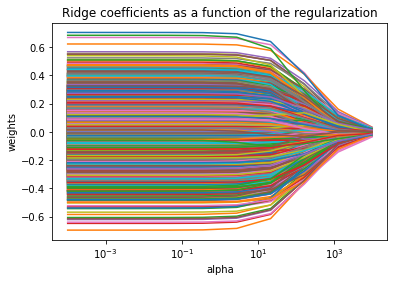

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.75399259833844, tolerance: 7.282365700000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303.33152123916585, tolerance: 7.282365700000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532.4195813988762, tolerance: 7.282365700000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

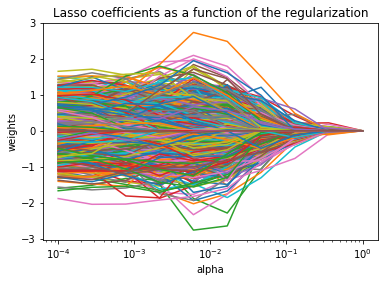

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.92901368379337, tolerance: 7.282365700000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.09820994528442, tolerance: 7.282365700000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426.61425914213527, tolerance: 7.282365700000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

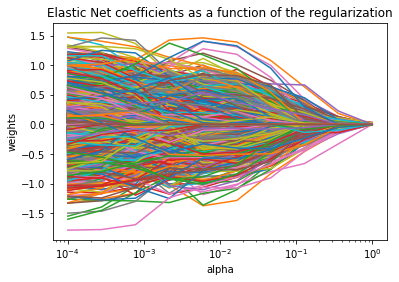

In [44]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np

n_alphas = 10
alphas = np.logspace(-4, 4, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_[0])

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

alphas = np.logspace(-4, 0, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


coefs = []
for a in alphas:
    elastic = ElasticNet(alpha = a, fit_intercept=False)
    elastic.fit(X_train, y_train)
    coefs.append(elastic.coef_)

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Elastic Net coefficients as a function of the regularization')
plt.axis('tight')
plt.show()




yhat = ridge.predict(X_test)
#you will get a matrix of predictions corresponding to the predictions made at each point in the regularization path. 



* Calculate a loss function (which one is appropriate for a linear model?) at each value of $\lambda$ for lasso, ridge, and the elastic net, using
the training data. Repeat for the testing data. Plot both of these curves---these are the training and testing learning curves.

* What values of $\lambda$ give solutions that approach that of ordinary linear regression (without regularization)? For lasso, what
value of $\lambda$ corresponds to a model with no predictors? What are the predictions for this model?